In [157]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [158]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [164]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


<AxesSubplot:xlabel='X1', ylabel='X2'>

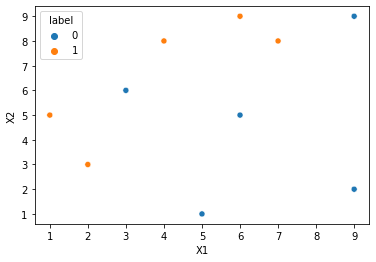

In [160]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [110]:
# Amader ke ekhane protita Row te Weight dite hobe ...So amra ekhane proti 
# ta row er weight diye dichi.

df['weights'] = 1/df.shape[0]

In [166]:
# Everybody Weight is same.
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [114]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [115]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

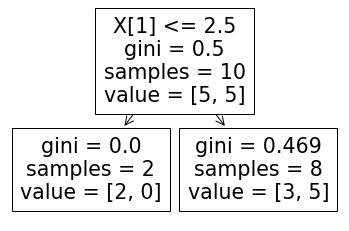

In [116]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

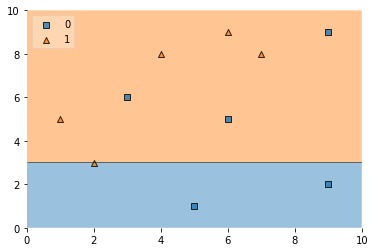

In [117]:
plot_decision_regions(X, y, clf=dt1, legend=2)

# here is 3 mistakes.

In [118]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [119]:
def calculate_model_weight(error):

 return 0.5*np.log((1-error)/(error))

# jodi kono Error na thake tahole    return 0.5*np.log((1-error)/(error+0.000001))

In [120]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)    # 0.3 cz we have Error 3 ta 0.1+0.1+0.1
alpha1

0.42364893019360184

In [121]:
# je je row vul chilo tar tar weight barbe ar je je row Correct chilo 
# tar weight kombe

# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha) # jodi lebel = predict leben same hoy tahole weight kombe
  else:
    return row['weights'] * np.exp(alpha)  # nahoy Barbe


In [122]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [123]:
df['updated_weights'].sum()

# Eta 1.0 howa dorkar tai abar same kaj gulo korbo.

0.9165153319682015

In [124]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [125]:
df['nomalized_weights'].sum()

1.0

In [126]:
# UPPer Range

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [127]:
# Lower Range

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [128]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [129]:
# Random num nibo. Ekhon Loop chalabo dekhar jonno ei random number kon range e ese porteche tokhon se Row gulo Loop er madhome Collect kore 
# data Frame Creat korbo.

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [130]:
index_values = create_new_dataset(df)

index_values

[6, 9, 9, 6, 1, 0, 8, 5, 6, 5]

In [131]:
# New dataFrame banaitechi With Upore ROW gulo ar ei nicher Column gulo diye.

second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
6,6,5,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1


In [132]:
dt2 = DecisionTreeClassifier(max_depth=1)
dt2

DecisionTreeClassifier(max_depth=1)

In [133]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [134]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 4.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]')]

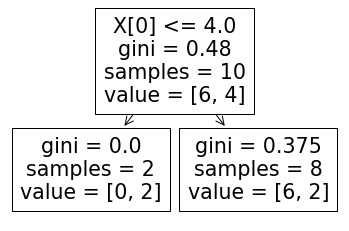

In [135]:
plot_tree(dt2)

<AxesSubplot:>

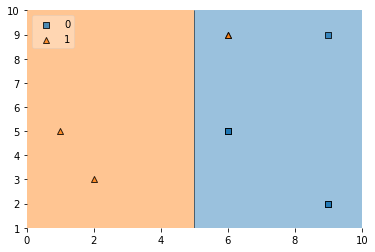

In [136]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [138]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0


In [139]:
alpha2 = calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [140]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [141]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427


In [142]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,0,0.297427,0.344313
6,6,5,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,0,0.297427,0.344313


In [143]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [144]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [145]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [146]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.038922,0.000000,0.038922
9,9,2,0,0.1,0,0.038922,0.038922,0.077843
9,9,2,0,0.1,0,0.038922,0.077843,0.116765
6,6,5,0,0.1,0,0.038922,0.116765,0.155687
1,2,3,1,0.1,1,0.038922,0.155687,0.194608
0,1,5,1,0.1,1,0.038922,0.194608,0.233530
8,9,9,0,0.1,0,0.038922,0.233530,0.272452
5,6,9,1,0.1,0,0.344313,0.272452,0.616765
6,6,5,0,0.1,0,0.038922,0.616765,0.655687
5,6,9,1,0.1,0,0.344313,0.655687,1.000000


In [147]:
index_values = create_new_dataset(second_df)

In [148]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [149]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

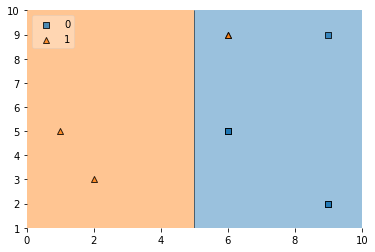

In [150]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [151]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
6,6,5,0,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0


In [152]:
alpha3 = calculate_model_weight(0.6)
alpha3

-0.20273255405408214

In [153]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.20273255405408214


# Prediction

In [167]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [168]:
dt2.predict(query)

array([1], dtype=int64)

In [169]:
dt3.predict(query)

array([1], dtype=int64)

In [170]:
alpha1*1 + alpha2*(1) + alpha3*(1)

0.914063556699465

In [171]:
np.sign(0.914063556699465)

1.0

In [172]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [173]:
dt2.predict(query)

array([0], dtype=int64)

In [174]:
dt3.predict(query)

array([0], dtype=int64)

In [175]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1) # 0 er poriborte -1( Boosting er khetre 0 er bodole -1 use kora hoy)

-0.06676569631226131

In [176]:
np.sign(-0.06676569631226131)

-1.0